# Hypothesis Tests

## Introduction

In this notebook, we will discuss hypothesis tests. To understand statistical tests, it is useful to think about how a judge in a court must make a decision about whether to convict a defendant or not. The prosecution presents a case that the defendant is guilty, the case being a summary of the evidence that the defendant committed the crime. The judge does not know wheher the defendent is guilty or not, so he/she must rely on the evidence presented by the prosecution and determine if the evidence is strong enough to convict the defendant. The judge can make to types of error:

1. To convict an innocent person (Type I error)
2. Fail to convict a guilty person (Type II error)


| Reality/Decision | Convict | Fail to convict |
|----------|----------|----------|
| Defendent innocent    | Type I error   | Correct   |
| Defendent guilty    | Correct   | Type II error   |


In statistics we very much face the same situation as the judge. We have a research question, we collect data and we must decide whether the data appears consistent with some conjecture about the state of the world or not. The conjecture is usually called a hupothesis. 

## Hypothesis Testing

Let's say that we suspect that the share of customers interested in some of our products is $p \geq 0.7$ and suppose that we collect a sample of 100 customers and find that 60 of them are interested. The question is: is the sample consistent with our conjecture that the share of interested customers is at least 0.7?

$$
\begin{align*}
H_0&: p \geq 0.7 \quad \text{Null Hypothesis}\\
H_1&: p < 0.7 \quad \text{Alternative}
\end{align*}
$$

Now we need to decide whether our observed 60 interested customers are consistent with the null hypothesis. Intuitively, if the share of interested customers is 0.7, then we would expect to see 70 interested customers in our sample of 100 customers. The question is: is 60 interested customers too far from 70 to be consistent with the null hypothesis? In other words: if the share of interested customers is 0.7, how likely is it that we would see 60 or fewer interested customers in our sample of 100 customers?

To do this, we need to summarize the data in a single number that we can use to make a decision. Fortunately, in this case the number of interested customers in our sample is already a summary of the data. Nevertheless, it is useful to write it down formally. Let $X_1, X_2, \ldots, X_n$ are the answers of the $n = 100$ customers in our sample before they answer. Each $X_i$ is a random variable that can take the value 1 if the customer is interested in our products and 0 otherwise and because our sample is random, the first customer's answer is one with probability $p = 0.7$ and zero with probability $1 - p = 0.3$. The same is true for the second customer and so on.

Let us look at $p = 0.7$ which is closest to the alternative hypothesis. We can ask the question: what is the probability to observe 60 or fewer interested customers in our sample of 100 customers if the share of interested customers is 0.7? In order to answer this question, we need to know the distribution of the random variable $X = X_1 + X_2 + \ldots + X_{100}$. Assuming that the answers of the customers are independent, we have that $X$ is a binomial random variable with parameters $n = 100$ and $p = 0.7$. The probability mass function of a binomial random variable is given by

$$
\begin{align*}
P(X \leq 60) &= P(X = 0) + P(X = 1) + \ldots + P(X = 60)\\
&= \sum_{k = 0}^{60} \binom{100}{k} 0.7^k 0.3^{100 - k} \\
& = \binom{100}{0} 0.7^0 0.3^{100} + \binom{100}{1} 0.7^1 0.3^{99} + \ldots + \binom{100}{60} 0.7^{60} 0.3^{40}
\end{align*}
$$

It is cumbersome to calculate this sum by hand, but it is easy to calculate it using a computer. In Python, we can use the `scipy.stats.binom` module to calculate the probability mass function of a binomial random variable. The function `binom.cdf` calculates the cumulative distribution function of a binomial random variable. The cumulative distribution function of a random variable $X$ is defined as $F(x) = P(X \leq x)$ and is exactly what we need here.

In [3]:
from scipy import stats
import numpy as np

n = 100
p = 0.7
p_hat = 0.6
expected_successes = p * n
observed_successes = p_hat * n

print("Probability of seeing less or equal to 60 successes out of 100 trials:", stats.binom.cdf(observed_successes, n, p))

Probability of seeing less or equal to 60 successes out of 100 trials: 0.020988576003924803


We have seen that the probability to observe 60 or fewer interested customers in our sample of 100 customers is about 0.021. This probability is called the p-value of the test and it is important to understand what it means. The number of successes (the interested customers) is a summary of the data (a statistic). When we computed the p-value using a population share of successes of 0.7, so the p-value is a **conditional** probability, the condition being that the null hypothesis is true. It tells you how surpirsing the data (as summarized by the statistic) is if the null hypothesis is true. This is similar to the approach in mathematics where we can prove something by assuming that some conjecture is true and then derive a contradiction. In applied statistics there is no such thing as a proof as in mathematics, but the p-value serves as a kind of probabilistic "proof". If it is very small, then the data is surprising if the null hypothesis is true and we choose to believe the data rather than the null hypothesis. If the p-value is large, then the data is not surprising and we can say that the data is consistent with the null hypothesis. To see this, we can run a small simulation to see how the p-value behaves if the null hypothesis is true.


In [4]:
## Generate a sample of 1000 binomial random variables, each showing the number of successes in 100 trials

sample = np.random.binomial(n, p, size = 1000)
# Print the first 20 samples
print(sample[0:20])
print("Mean of the samples:", np.mean(sample))

# Now we can count the number of samples with less or equal to 60 successes

print("Number of samples with less or equal to 60 successes:", np.sum(sample <= 60))

[70 68 72 70 76 76 72 66 61 64 74 66 72 75 71 69 71 70 70 58]
Mean of the samples: 70.033
Number of samples with less or equal to 60 successes: 15


In [5]:
1000 * 0.0209885760

20.988576

As the simulation shows, if the true share of the interested customers is 0.7, then we expect to get about 21 samples out of 1000 where the number of successes is less or equal to 60. This is a rare event, so with a p-value of 0.021 we can reject the null hypothesis that the share of interested customers is at least 0.7. In other words, the data is not consistent with the null hypothesis. At this point you should be asking the question: how surprising must the data be so that we conclude that the data is inconsistent with the conjecture. This question does not have a definitive answer, but a common rule of thumb is to reject the null hypothesis if the p-value is less than 0.05. This is called the 5% significance level.

## Tests for the Mean

Very often we are interested in the average value of a random variable. Consider for example the average height of a population. We collect a sample of $n = 80$ persons, ask them for their height and calculate the average height of the sample. We can ask the question: is the average height of the sample consistent with the conjecture that the average height of the population greater than 170 cm? Let us assume that all observations are independent and that the height of a person is normally distributed with mean $\mu$ and variance $\sigma^2$.

$$
\begin{align*}
H_0&: \mu \geq 170 \quad \text{Null Hypothesis}\\
H_1&: \mu < 170 \quad \text{Alternative}
\end{align*}
$$


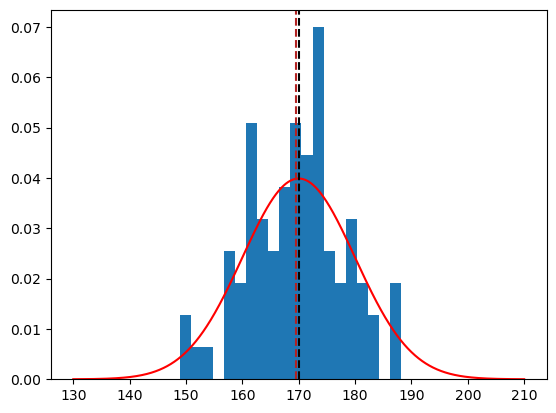

In [6]:
import matplotlib.pyplot as plt

# Simulate 80 draws from a normal distribution with mean 170 and standard deviation 10

n = 80
mu = 170
sigma = 10

sample = np.random.normal(mu, sigma, n)

# Plot the histogram of the sample and overlay the density of the normal distribution

plt.hist(sample, bins = 20, density = True)
x = np.linspace(130, 210, 1000)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, 'r')
plt.axvline(x = mu, color = 'black', linestyle = '--')
plt.axvline(x = sample.mean(), color = 'firebrick', linestyle = '--')
plt.show()


A summary of the data is a statistic that is called the z-statistic and it is defined as

$$
z = \frac{\bar{X} - \mu}{\sigma/\sqrt{n}}
$$

where $\bar{X}$ is the average height of the sample. As the z-statistic is a function of the data (it depends on the sample mean $\bar{X}$), it is a random variable. If the null hypothesis is true, then the z-statistic is normally distributed with mean 0 and variance 1. The p-value of the test is the probability to observe a z-statistic less than or equal to the observed z-statistic. In Python, we can use the `scipy.stats.norm` module to calculate the cumulative distribution function of a normal random variable. The function `norm.cdf` calculates the cumulative distribution function of a normal random variable.



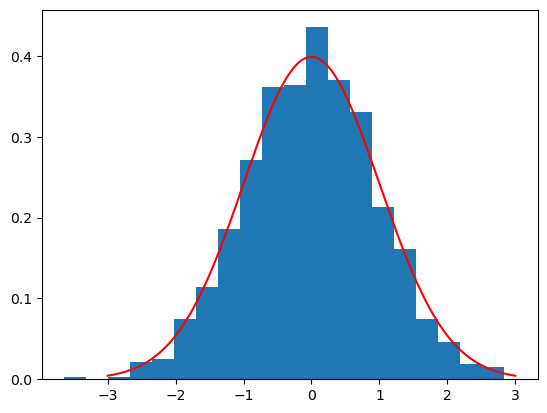

In [7]:
# Simulate 1000 samples of size 80 from a normal distribution with mean 170 and standard deviation 10

n = 80
mu = 170
sigma = 10
R = 1000

samples = np.random.normal(mu, sigma, (R, n))

# Calculate the z-statistic for each sample

z = (samples.mean(axis = 1) - mu) / (sigma / np.sqrt(n))

# Plot the histogram of the z-statistics and overlay the density of the standard normal distribution

plt.hist(z, bins = 20, density = True)
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, 'r')
plt.show()



What you see in the graphic above is called the distribution of the z-statistic under the null hypothesis (i.e. assuming that it is true). We can use this distribution much in the same way as we used the binomial distribution in the previous example. Small values of the z-statistic are surprising if the null hypothesis is true and we can reject the null hypothesis if the p-value is less than 0.05.

In [8]:
# z-statistic for the sample

z = (sample.mean() - mu) / (sigma / np.sqrt(n))
print("z-statistic for the sample:", z)

# p-value for the z-statistic

p_value = stats.norm.cdf(z)
p_value


z-statistic for the sample: -0.4229989042285584


0.3361480302678162

The probability to observe a z-statistic less than or equal to the one computed in the sample is about 0.81. This is a large p-value, so we cannot reject the null hypothesis that the average height of the population is at least 170 cm. Now, this is not surprising, because we have taken the sample from a normal distribution with mean 170 cm. Let us now see how the distribution of the z-statistic looks like if the null hypothesis is false. We can do this by simulating the distribution of the z-statistic under the alternative hypothesis.

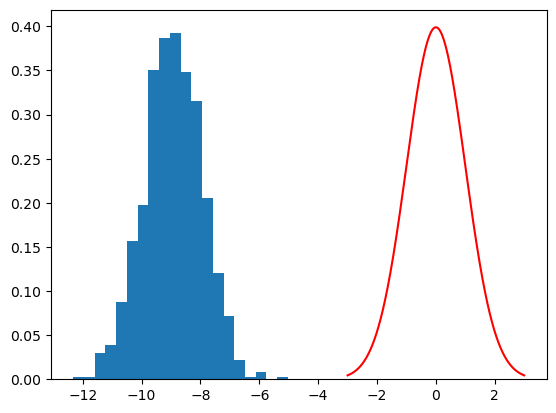

In [9]:
# Generate 1000 samples of size 80 from a normal distribution with mean 160 (a value from the alvernative) and standard deviation 10

n = 80
mu = 160
sigma = 10
R = 1000

samples = np.random.normal(mu, sigma, (R, n))

# Calculate the z-statistic for each sample

z = (samples.mean(axis = 1) - 170) / (sigma / np.sqrt(n))


# Plot the histogram of the z-statistics and overlay the density of the standard normal distribution

plt.hist(z, bins = 20, density = True)
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, 'r')
plt.show()



What you should see in this simulation is that the distribution of the z-statistic is shifted to the left and is not the same as the distribution of the z-statistic under the null hypothesis (the red density curve). This is because the average height of the population from wich we have taken the samples is 160 cm, not 170 as in the null hypothesis.

In [10]:
# Take a single sample of size 80 from a normal distribution with mean 160 and standard deviation 10, 
# calculate the z-statistic and compute its p-value

sample = np.random.normal(160, 10, n)

z = (sample.mean() - 170) / (sigma / np.sqrt(n))

p_value = stats.norm.cdf(z)
p_value

2.193255579630954e-22

The p-value of the test is very small, so the data is extremely surprising. Here we reject the null hypothesis.

## Some Notes about the p-value

The p-value serves to reject or not to reject the null hypothesis. However, you should not consider it a measure of strength of evidence *for* the null hypothesis. As the p-value is calculated using the data, it itself is a random variable. It can be shown that under the null hypothesis it is uniformly distributed over the interval between 0 and 1. So, given a true null hypothesis, you would falsly reject it in 5% of the cases (different samples) if you follow the rule to reject for a p-value less than 0.05.


Number of p-values less than 0.05: 54
Proportion of p-values less than 0.05: 0.054


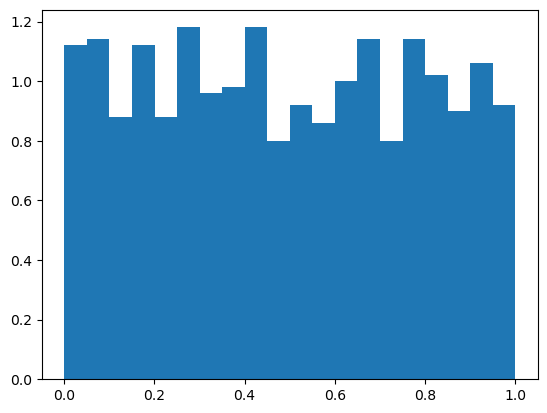

In [12]:
# Generate 1000 samples of size 80 from a normal distribution with mean 170 and standard deviation 10

n = 80
mu = 170
sigma = 10
R = 1000

samples = np.random.normal(mu, sigma, (R, n))

# Calculate the z-statistic for each sample

z = (samples.mean(axis = 1) - 170) / (sigma / np.sqrt(n))

# Calculate the p-value for each z-statistic

p_values = stats.norm.cdf(z)

# Count the number of p-values less than 0.05

print("Number of p-values less than 0.05:", np.sum(p_values < 0.05))

# Calculate the proportion of p-values less than 0.05

print("Proportion of p-values less than 0.05:", np.mean(p_values < 0.05))

# Show the histogram of the p-values

plt.hist(p_values, bins = 20, density = True)
plt.show()
